# **LAB SESSION 1 - DECISION TREES**
# **CORRECTION**

## Utils

In [8]:
#conda install -c conda-forge scikit-learn, pandas 

In [9]:
#conda install seaborn

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).


**Question 0. First of all,**
 - **load the data and look at them (display the dimension and some descriptive statistics)**
 - **visualize the data.**
 - **select the variables that we will use in the exercise. Create a variable `target` with the the names of the target variable `species` and create also the array `features` which contains the names of the two predictors: `bill_length_mm`, `bill_depth_mm`.**
 - **split the dataset into a training and testing dataset (use the value 1023 for `random_state` and the porportion 25% for the test set).** 

In [2]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd
import numpy as np
penguins = pd.read_csv("penguins.csv")
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
5,Adelie,Torgersen,38.9,17.8,181,3625,female,2007
6,Adelie,Torgersen,39.2,19.6,195,4675,male,2007
7,Adelie,Torgersen,41.1,17.6,182,3200,female,2007
8,Adelie,Torgersen,38.6,21.2,191,3800,male,2007
9,Adelie,Torgersen,34.6,21.1,198,4400,male,2007


In [3]:
penguins.shape

(333, 8)

In [4]:
penguins.describe() #give a statistic summary of all the continuous variable (only continuous variables)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
# (2) Select the variables that we will use in the exercise
penguins_classif=penguins[["species","bill_length_mm","bill_depth_mm"]]

In [6]:
target_column = "species" # The response variable that we will consider
features_columns = ["bill_length_mm", "bill_depth_mm"] # The predictors/features used to predict the target

In [7]:
penguins_classif.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

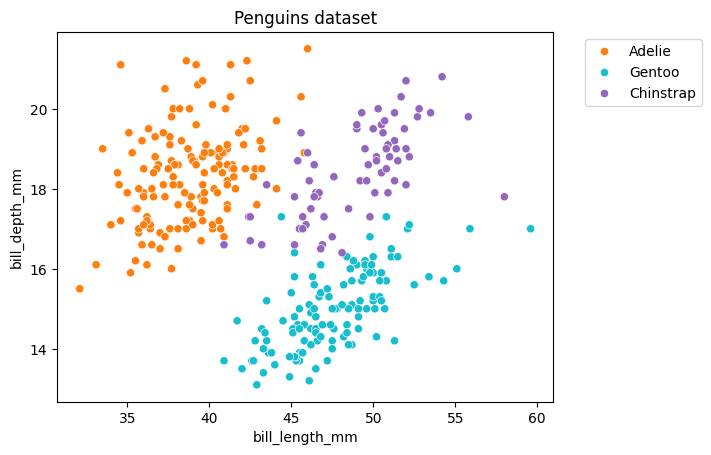

In [8]:
# (3) Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Penguins dataset")

In [9]:
# (4) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
data, target = penguins_classif[features_columns], penguins_classif[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=1023, test_size=0.25)

In [10]:
print(data_test.shape);print(data_train.shape)

(84, 2)
(249, 2)


**Question 1. Fit a classification tree named `tree_clf` to explain `species` by using `bill_length_mm`, `bill_depth_mm`. Use `DecisionTreeClassifier` from `sklearn.tree`. have a look at the documentation (here)[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html]. Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and the Gini criterion. The tree has a maximum depth of 2 and you use the value 1023 for `random_state`.**

|--- bill_length_mm <= 42.55
|   |--- bill_depth_mm <= 14.85
|   |   |--- class: Gentoo
|   |--- bill_depth_mm >  14.85
|   |   |--- class: Adelie
|--- bill_length_mm >  42.55
|   |--- bill_depth_mm <= 16.35
|   |   |--- class: Gentoo
|   |--- bill_depth_mm >  16.35
|   |   |--- class: Chinstrap



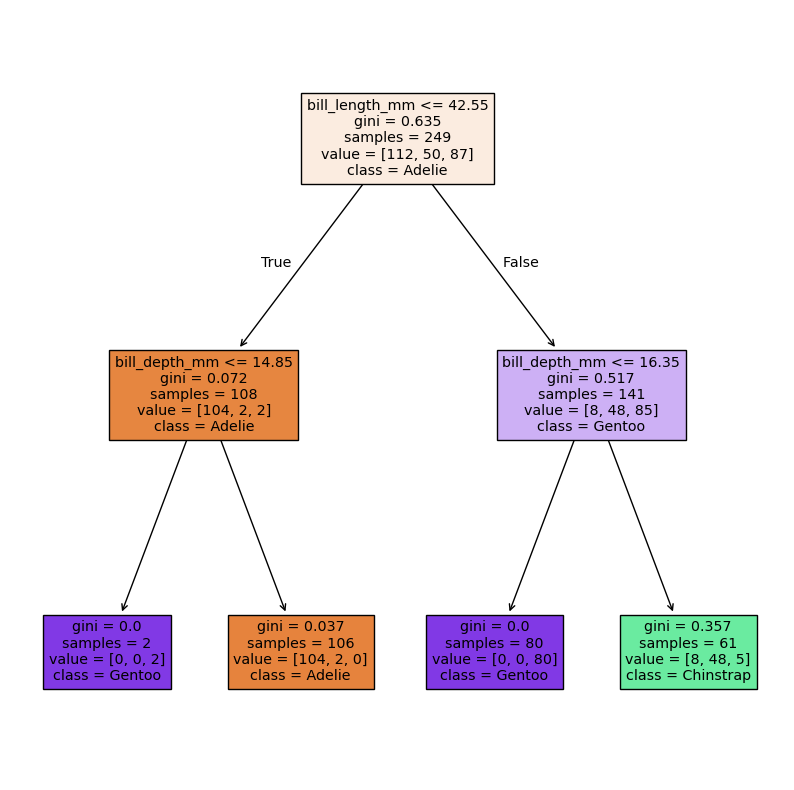

In [11]:
## Solution

# Step 1: create the object tree_clf, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(random_state=1023,max_depth=2)

# Step 2: build the tree on the train set by indicating the input data and the taRget variable 
tree_clf.fit(data_train, target_train)

# Step 3: plot the tree (text representation)
from sklearn import tree
text_representation = tree.export_text(tree_clf,feature_names=features_columns)
print(text_representation)


# Step 4: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,10))
tree_plot = tree.plot_tree(tree_clf,feature_names=features_columns,class_names=tree_clf.classes_,filled=True)





**Question 1bis. Why do we need to choose a value for `random_state`? (use the documentation).**

<span style="color:green;font-weight:italic"> Answer: the parameter `random_state` controls the randomness during the tree construction. When splitting a node, a random selection of the split is performed if there are several "best" splits. Then using a value for `random_state` ensure that we get the same tree if we compute several time the command lines.</span>

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.** 

*Indications:* 
- *bill_length_mm is consider as the first feature and so is denoted by $X_1$ while bill_depth_mm is the second feature and is then denoetd by $X_2$.*
- *The modalities of `Species`will be coded as integer: Adelie =0, Chinstrap=1 and Gentoo=2.*

**Solution:**

$$f_n(\mathbf x) = 2 \times \, \mathbf 1_{\lbrace (x_1 \leq 42.55 ,  x_2 \leq 14.85 ) \; or \; (x_1 > 42.55, x_2 \leq 16.35 )\rbrace } + 0\times \, \mathbf 1_{\lbrace x_1 \leq 42.55, x_2 > 14.85 \rbrace} + 1 \times \,  \mathbf 1_{\lbrace x_1 > 42.55 , x_2 > 16.35 \rbrace}$$

OR (EQUIVALENT SOLUTION)

$$f_n(\mathbf x) = 2 \times \, \mathbf 1_{\lbrace (x_1 \leq 42.55 ,  x_2 \leq 14.85 )\rbrace}  \; + \; 2 \times \, \mathbf 1_{\lbrace (x_1 > 42.55, x_2 \leq 16.35 )\rbrace} + 0\times \, \mathbf 1_{\lbrace x_1 \leq 42.55, x_2 > 14.85 \rbrace} + 1 \times \,  \mathbf 1_{\lbrace x_1 > 42.55 , x_2 > 16.35 \rbrace}$$



**Question 3. Consider a penguin with a bill measuring 45mm (length) and 18mm (depth). By looking at the tree plot, give the probability that this penguin belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ? Check your result by using the methods `predict_proba()`,see ([here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).**

**Solution:**

Based on the tree representation, we can see that the observation will fall into the fourth leaf (the green one) and in this leaf there are 57 observations whose 3 are assigned to the class Adelie. So, we can write

$$\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)= \frac{8}{61} \approx 0.13$$

In [30]:
## Check
new_obs = pd.DataFrame({'bill_length_mm': [45], 'bill_depth_mm': [18]}, index =['new_obs'])
new_obs
tree_clf.predict_proba(new_obs)

array([[0.13114754, 0.78688525, 0.08196721]])

**Question 4. Plot the data and the partition associated to the tree. Does the partition agree with the treedisplayed at the previous question ?**

In [31]:
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}


import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]



/opt/anaconda3/envs/Python3new/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


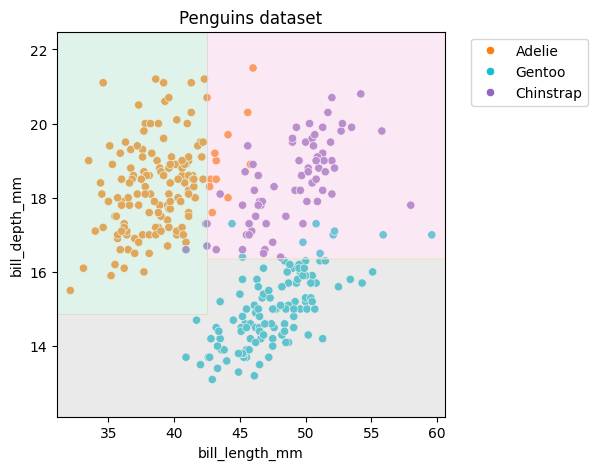

In [32]:
## Solution 
fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],hue=target_column, palette=palette)# Define the grid : the data space 
plot_decision_function(tree_clf, range_features, ax=ax) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
_=plt.title("Penguins dataset")# graphical options

<span style="color:green;font-weight:italic"> Answer: the partition agrees with the tree. We can see two splits based on `bill_depth_mm`and one according to `bill_length_mm`.</span>

**Question 5: Look at the tree structure: nodes, impurity, spliting threshold, etc. For each line, what repsent the output ?**
*Indication: see the link https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=sklearn%20tree%20_tree%20tree
and look at the object: tree_clf.tree_*

In [33]:
## Solution
print(tree_clf.tree_.feature) # give the ordered list of the split variables. 
print(tree_clf.tree_.node_count)# give in order the number of observations in each node. 
print(tree_clf.tree_.children_left)#  id of the left child nodes (-1 if leaf node)
print(tree_clf.tree_.children_right)#  id of the right child nodes (-1 if leaf node)
print(tree_clf.tree_.impurity)# the impurity in each node
print(tree_clf.tree_.threshold)# the threshold in each node

[ 0  1 -2 -2  1 -2 -2]
7
[ 1  2 -1 -1  5 -1 -1]
[ 4  3 -1 -1  6 -1 -1]
[0.63528008 0.07201646 0.         0.03702385 0.517479   0.
 0.35689331]
[42.54999924 14.8499999  -2.         -2.         16.34999943 -2.
 -2.        ]


**Question 6. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified? Give the error rate (displayed only twe decimals).**

<Figure size 300x300 with 0 Axes>

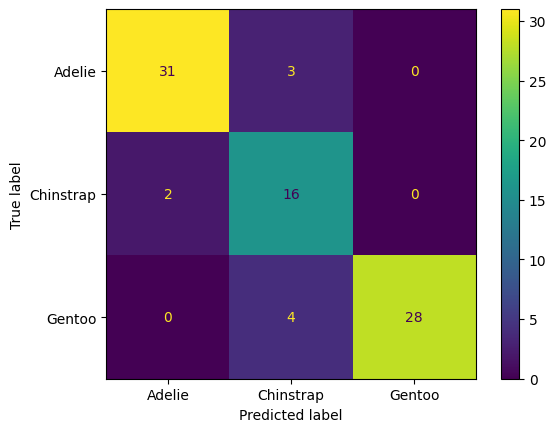

In [14]:
predictions_test = tree_clf.predict(data_test)
#print(tree_clf.predict(data_test))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
fig = plt.figure(figsize=(3,3))
disp.plot() 

<span style="color:green;font-weight:italic"> Answer: there are 9 observations misclassified. 2 of which are Chinstrap and are classified as Adelie. 3 Adelie are classified as Chinstrap and 4 chinstrap are classifed as Gentoo.</span>

In [15]:
acc = tree_clf.score(data_test,target_test);print("Error rate of the tree:",round(1-acc,2))

Error rate of the tree: 0.11


**Question 7. Fit a second tree with the gini criterion, a maximum depth of 5 and `random_state`=1023. Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees. What tree do you choose? Justify.**

In [16]:
## Solution

# Step 1: create the object tree_clf_d5, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree5 = DecisionTreeClassifier(random_state=1023,max_depth=5)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree5.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5, random_state=1023)

Error of the second tree: 0.06


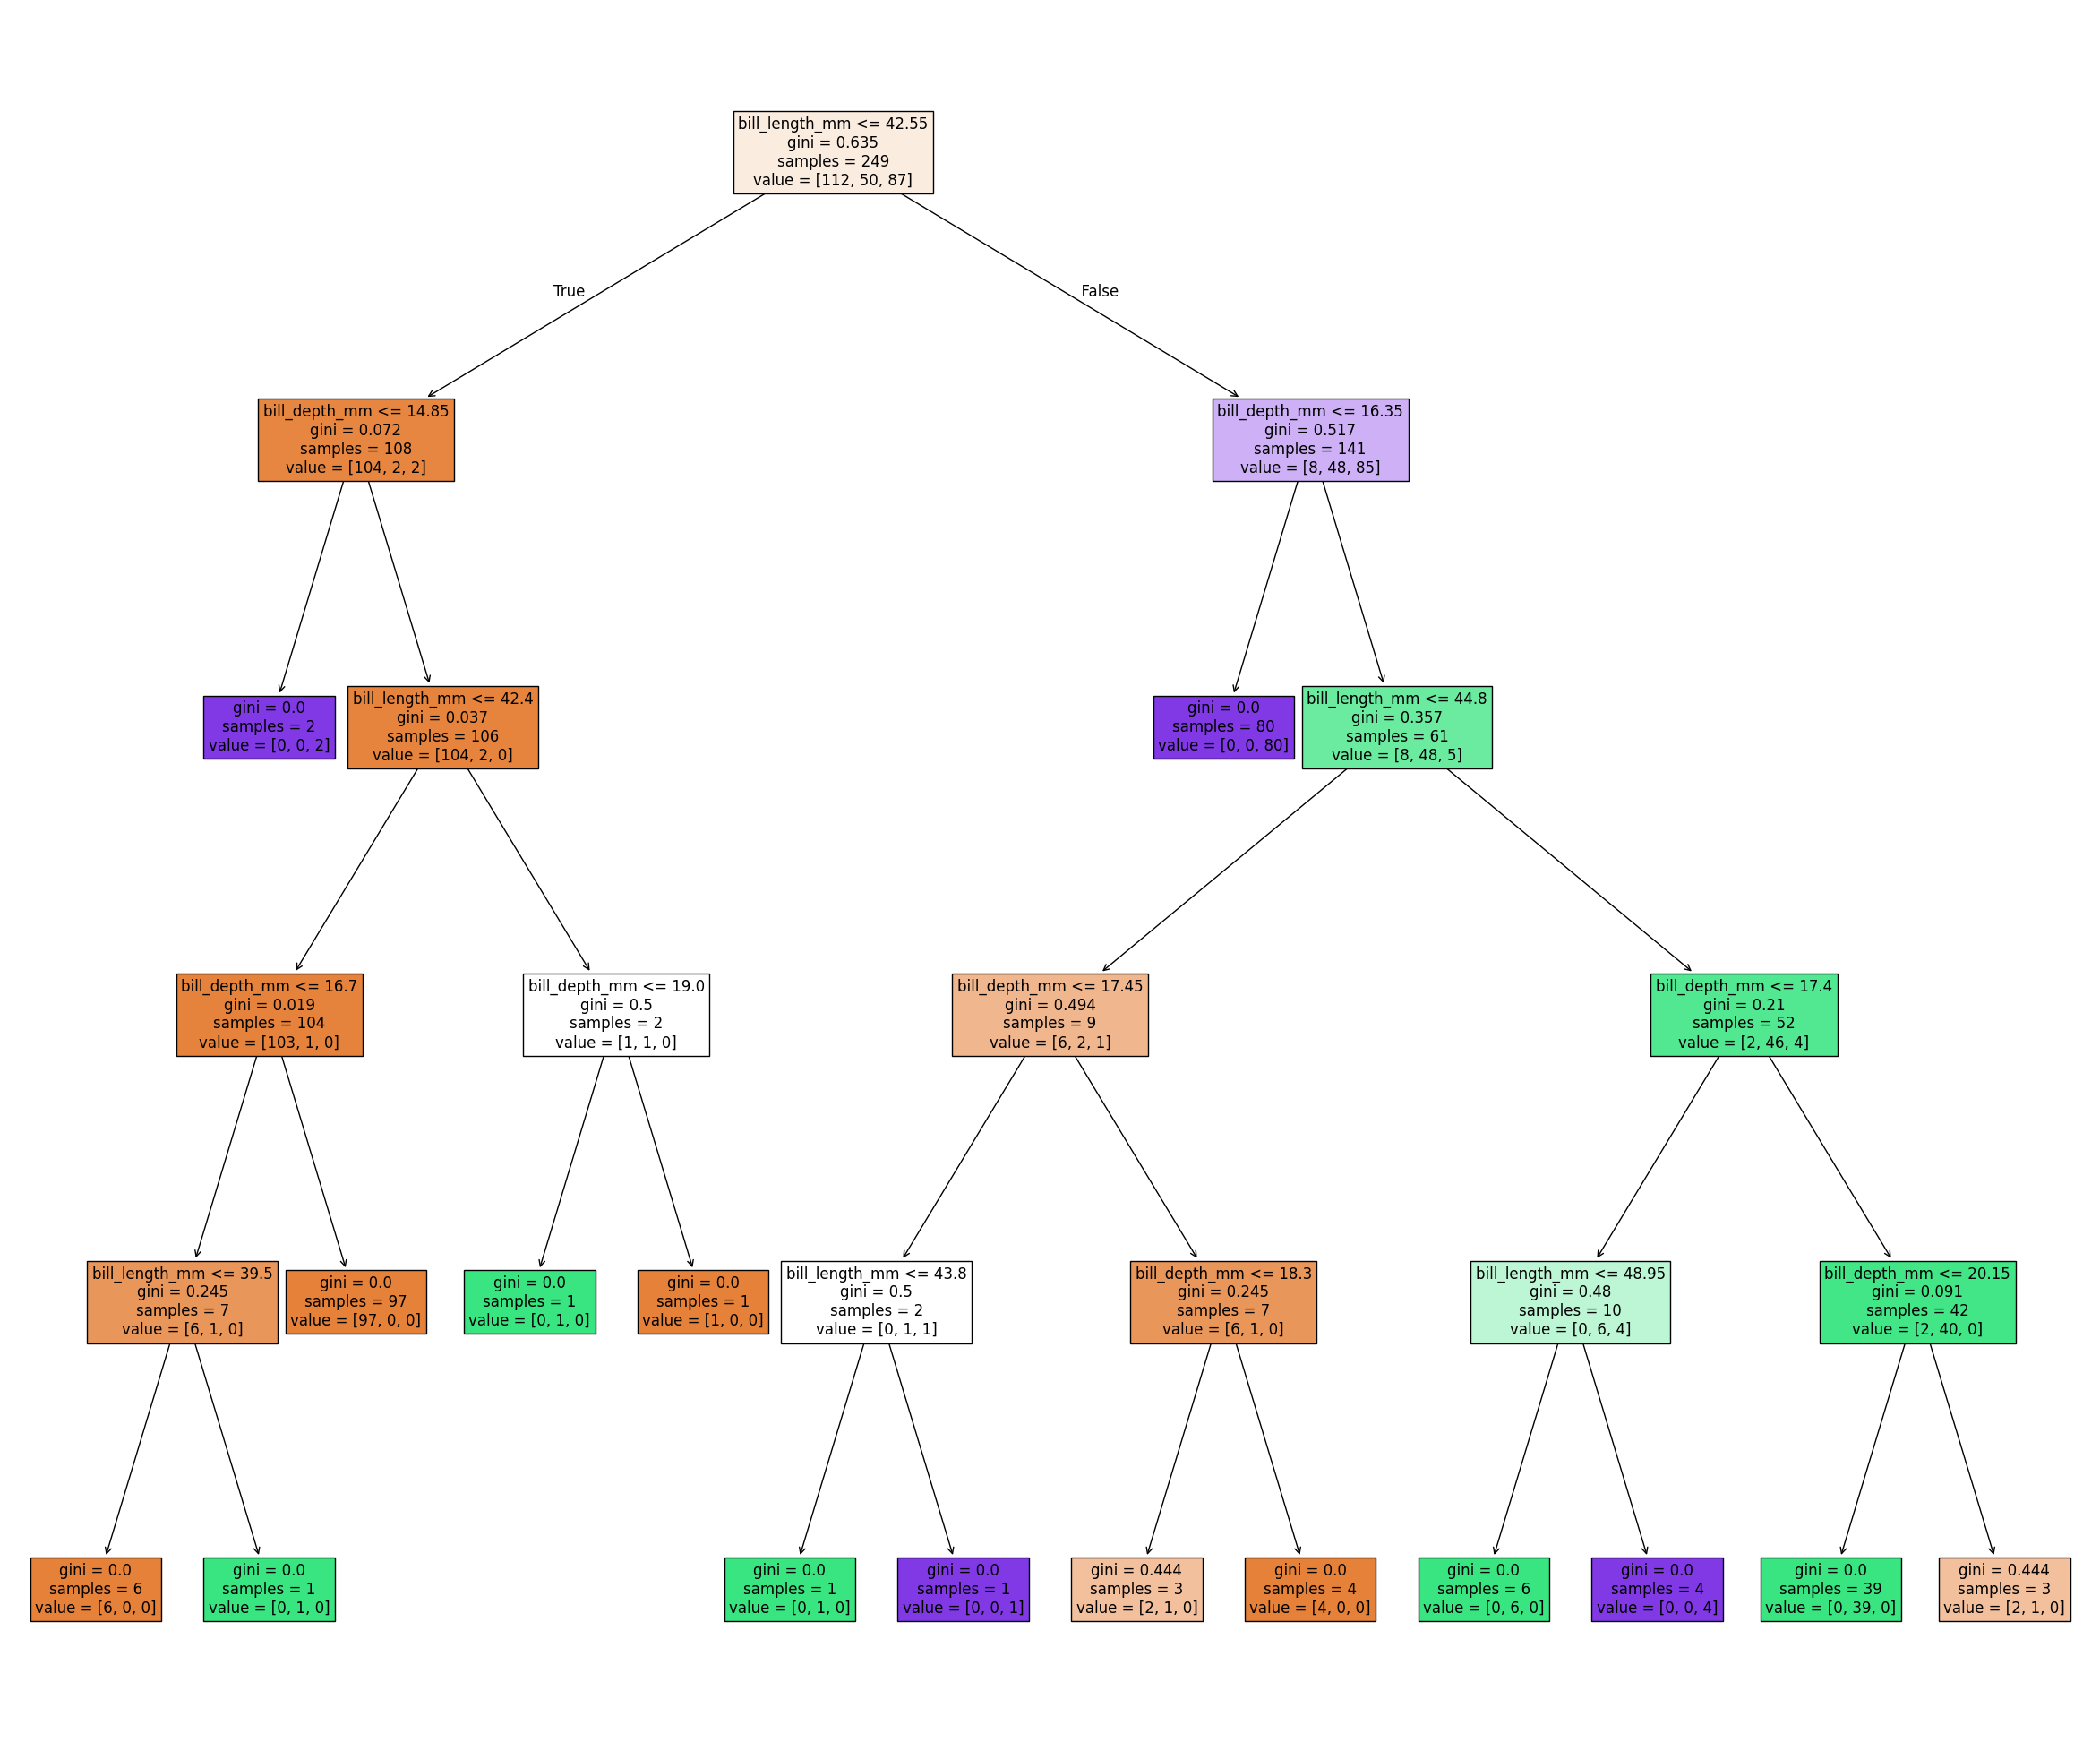

<Figure size 1000x1000 with 0 Axes>

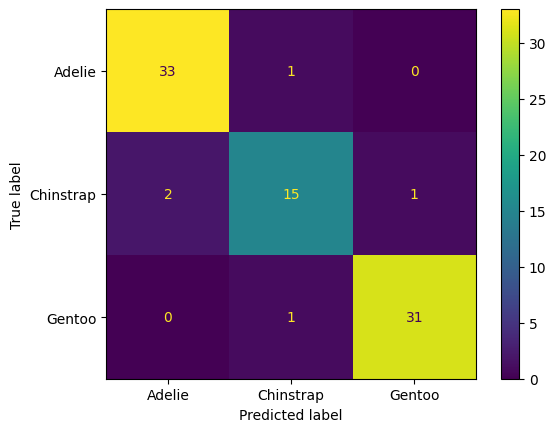

In [17]:
# Step 3: plot the tree (plot the figure)
fig = plt.figure(figsize=(30,25))
tree5_plot = tree.plot_tree(tree5,feature_names=features_columns,filled=True, fontsize=12 )

# Step 4: compute the accuracy of the tree using the test set and the confusuon matrix
pred_tree5 = tree5.predict(data_test)
acc_tree5 = tree5.score(data_test,target_test);print('Error of the second tree:',round(1-acc_tree5,2))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test,pred_tree5),display_labels=tree5.classes_)
fig = plt.figure(figsize=(10,10))
disp.plot() 

<span style="color:green;font-weight:italic"> Answer: the second tree is more complex than the first one but it is also twice more accurate to predict the penguin species. So, even if this tree is more difficult to interpret we select the tree with depth 5. </span>

**BONUS. As we don't know what what is the optiml size of the tree, we will apply the cost-complexity pruning method that consists in the following steps.**
   - **Step 1: Fit the maximum tree (don't choose any value for max_depth and use random_state=1023)**
   - **Step 2: Get a sequence of values for the parameter (ccp_alpha) using the method `cost_complexity_pruning_path()` and built a tree for each value of the complexity parameter. Indication: the parameter `ccp_alpha`enables to make a trade-off between accuracy and complexity.**
   - **Step 3: Compute the accuracy on both the train set and test set for each tree.**
   - **Step 4: Draw the following plots :**
      **Plot 1 = number of nodes of a tree vs ccp_alpha,**
      **Plot 2 = tree depth vs ccp_alpha**
      **Plot 3 and 4 = accuracy vs ccp_alpha for training and testing sets.**
      
**Run the code below and commend the graphics. What tree do you select ? Justifiy and plot it.**

In [83]:
## Step 1
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=2310)

In [84]:
## Step 2
path = max_tree_clf.cost_complexity_pruning_path(data_train, target_train)
ccp_alphas= path.ccp_alphas; #print('ccp-alphas values:',ccp_alphas)

tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=2310, ccp_alpha=alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs]#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs]#a vector with the depth for all decision trees 

In [85]:
## Step 3
train_acc = [tree_clf.score(data_train, target_train) for tree_clf in tree_clfs]
test_acc = [tree_clf.score(data_test, target_test) for tree_clf in tree_clfs]

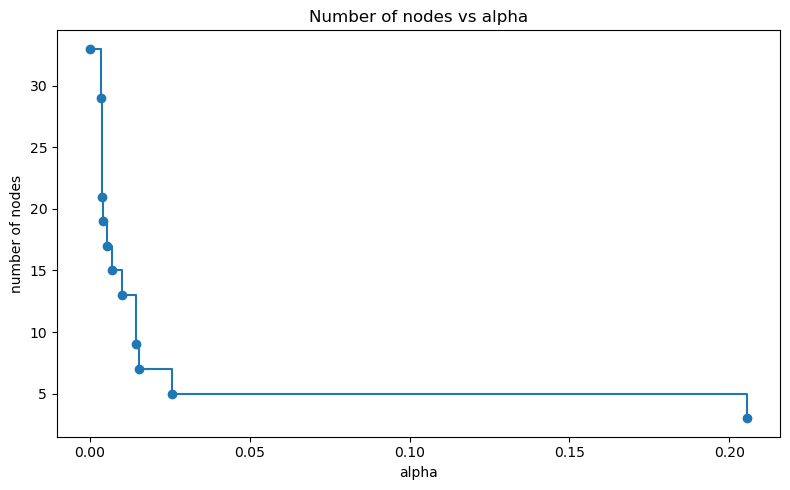

In [86]:
## Step 4

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

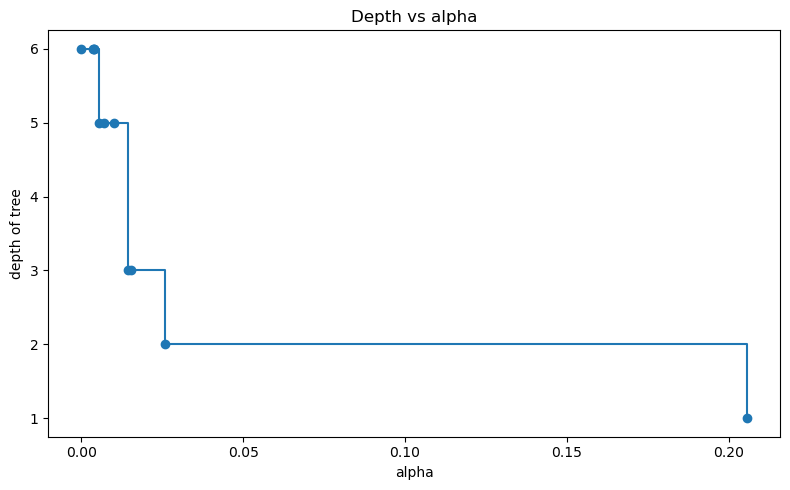

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

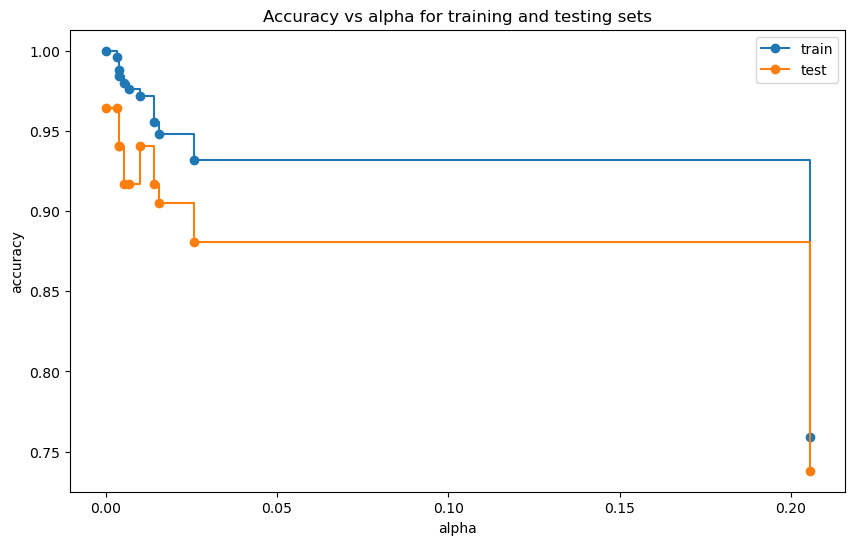

In [89]:
## (e) Plot 3
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, train_acc, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="test",   drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

<span style="color:green;font-weight:italic"> Answer: we select the tree with the maximal accuracy on the test set. if there are several trees that achieves the maximal accuracy, we choose the smallest one.</span>

In [90]:
## To get the selected tree

index=np.where(test_acc==max(test_acc))# find the index for the alpha values that maximize the accuracy on the test set
print(index)
best_alpha=ccp_alphas[index]; print(best_alpha)# choose the 'best alpha' (There are several values for alpha that maximize the accuracy and the test set. 
#So the best value for alpha is the one that is associated to the smallest tree and associate to the simplest tree)

(array([0, 1]),)
[0.         0.00344234]


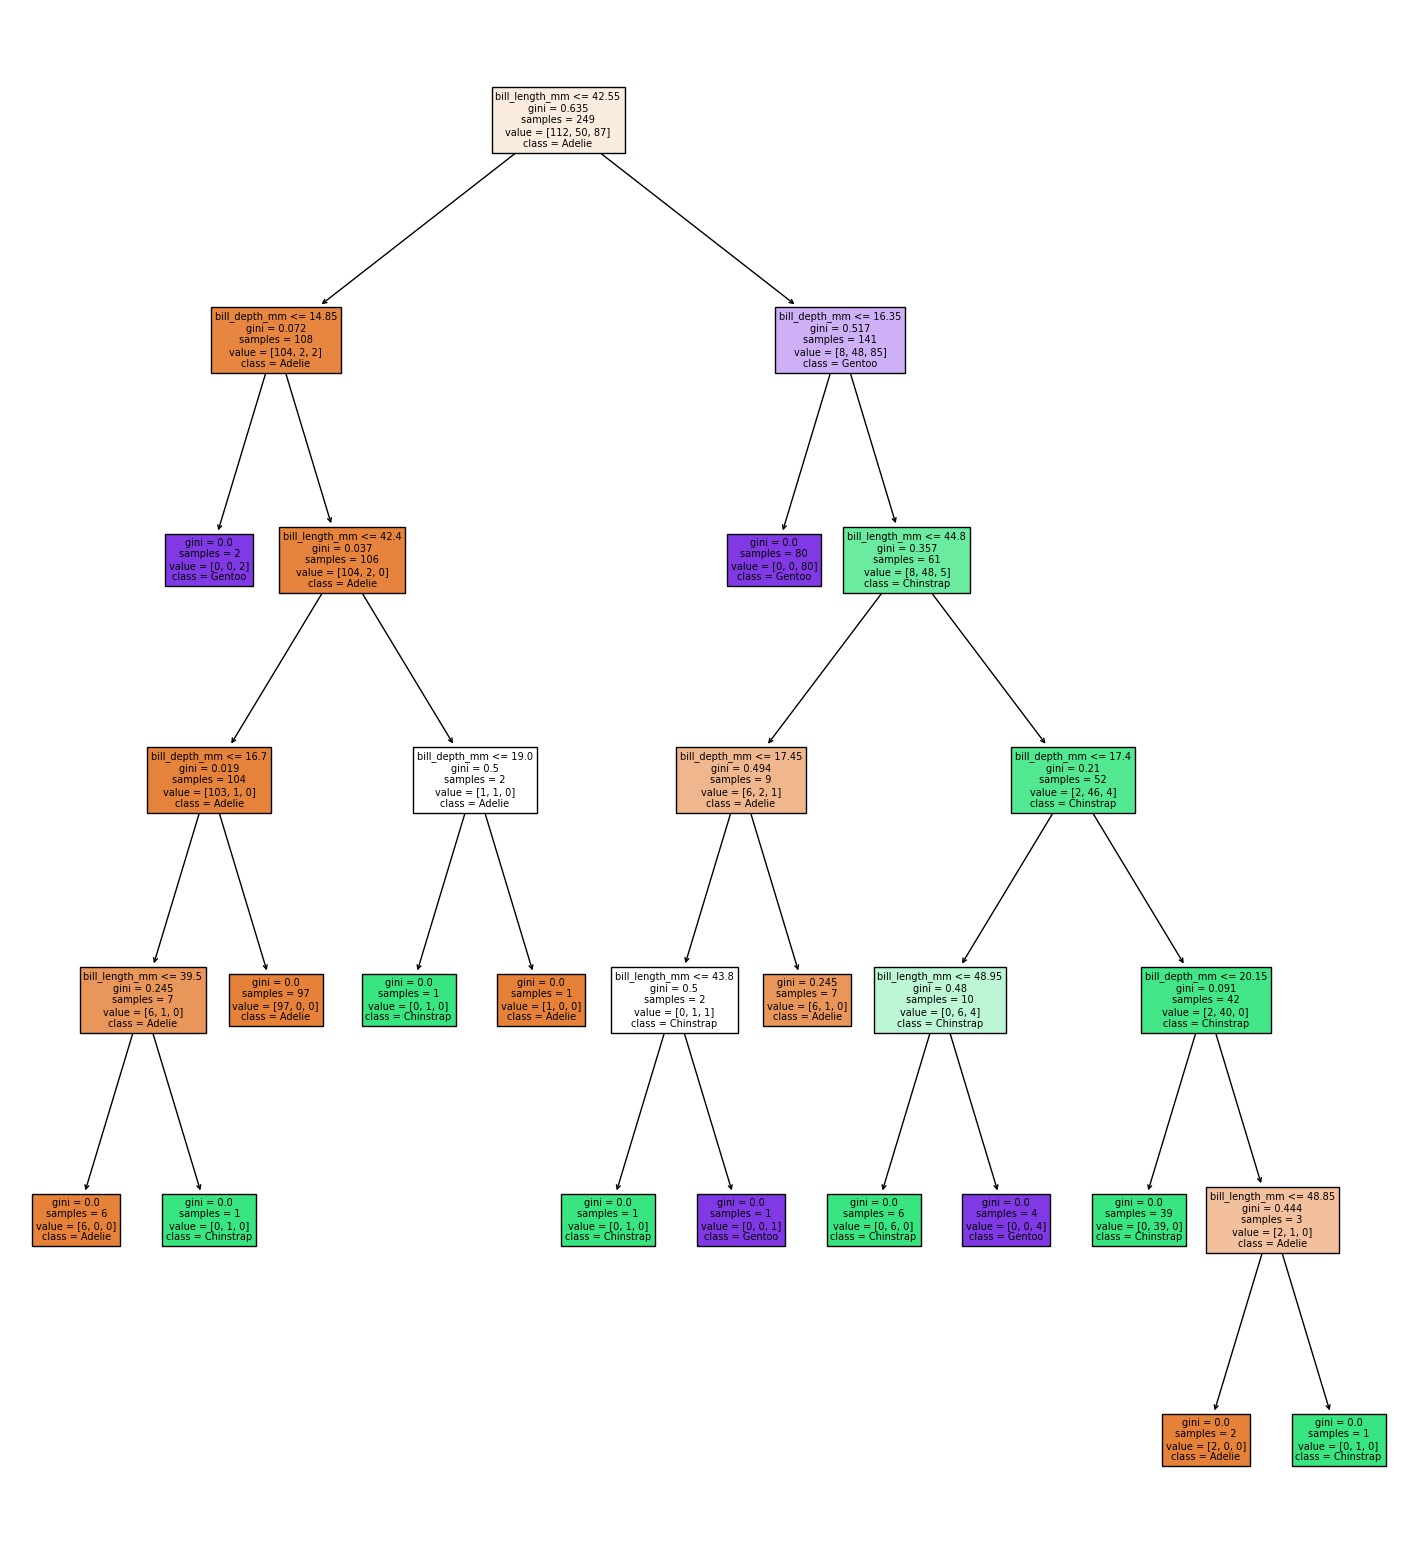

In [91]:
final_tree = tree_clfs[1] #the final tree
fig = plt.figure(figsize=(18,20))
final_tree_plot= tree.plot_tree(final_tree,feature_names=features_columns,class_names=final_tree.classes_,filled=True)# display the final tree

Text(0.5, 1.0, 'Penguins dataset')

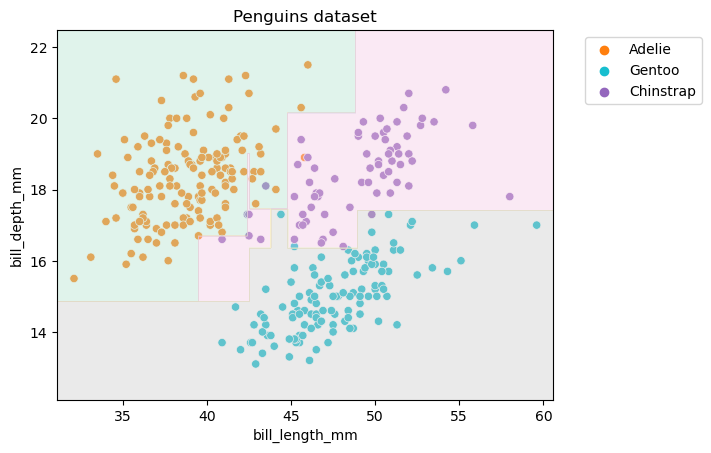

In [92]:
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(final_tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Penguins dataset")

## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).


**Question 0. First of all,**
 - **load the data and look at them (dimension, attributes, statistic summary).** 
 - **select the variables that we will use in the exercise (predictor = `sepal length`, target = `petal width`)**
 - **plot the data (x-axis = `sepal length`, y-axis = `petal width`).**
 - **split the dataset into a training and testing dataset (use `random_state`=2310 and `test_size`=0.3).**

In [11]:
# (1) Load the data and look at them (dimension, attributes, statistic summary)
import pandas as pd # data analysis
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [74]:
# (2) Select the variables that we will use in the exercise

X = pd.DataFrame(iris.data[:,0],columns=['Sepal length'])# Setal length
Y = pd.DataFrame(iris.data[:,3], columns=['Petal width']) # Petal width
data = pd.concat([X,Y], axis=1)
X_column=['Petal length']
data.head(10)

,Sepal length,Petal width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


Text(0.5, 1.0, 'Iris dataset')

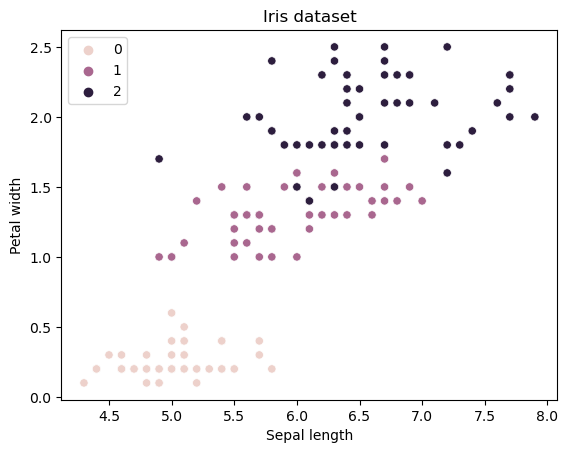

In [75]:
# (3) Plot the data

ax2 = sns.scatterplot(data=data,x="Sepal length", y="Petal width", hue=iris.target)
plt.title('Iris dataset') 

In [76]:
# (4) Split the dataset into train and test dataset

##---- Solution
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2310, test_size=0.3)

**Question 1. Fit a regression tree + a linear model to explain `petal width` by using `sepal length`. Use `DecisionTreeRegressor` from `sklearn.tree`. Have a look at the documentation ([here tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [here linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Plot the tree and give its text representation.**

**Indication: your tree is build by using the train set and an appropriate impurity criterion. The tree has a maximum depth of 3 and you use the value 2310 for `random_state`. Use the default parameter values for the linear model.**

In [77]:
## Solution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=2310)

lr= linear_regression.fit(X_train, Y_train)
tr=tree_reg.fit(X_train, Y_train)

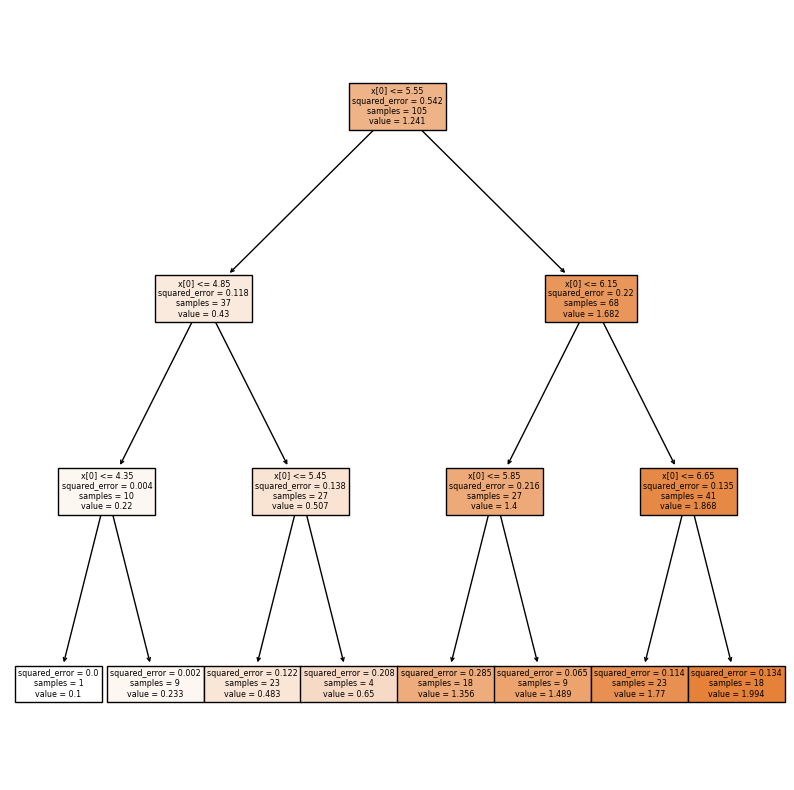

In [78]:
plt.figure(figsize=(10,10))
plot_tree(tr,filled=True)
plt.show()

**Question 2. Based on the plot of the tree, what it the prediction of the `petal width` for the new observation with `sepal length`= 2,4 ? How is computed the prediction on each leaf of the tree ?**

<span style="color:green;font-weight:italic"> Answer: based on the tree plot, we see that the observation will fall into the 4th leath (from the left to the right). So, the tree predicts that the petal width equals 0.433 for this observation. </span>

**Question 3. Compute the predictions of both models on the test set.** 

In [79]:
# Solution
lr_pred=lr.predict(X_test)
#print(lr_pred)
tr_pred=tr.predict(X_test)
#print(tr_pred)

**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

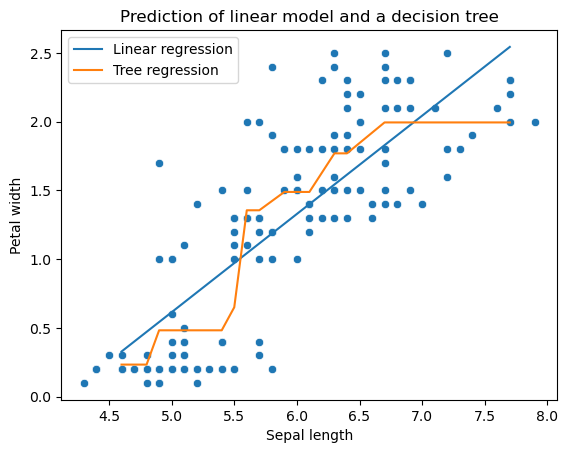

In [80]:
# Solution

X_test_sorted= X_test.sort_values(by='Sepal length')
ax2=sns.scatterplot(data=data,x="Sepal length", y="Petal width")
plt.plot(X_test_sorted, lr.predict(X_test_sorted),label="Linear regression")
plt.plot(X_test_sorted, tr.predict(X_test_sorted),label="Tree regression")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

**Question 5. Compute the error for both the models. Interpret the results.**

In [81]:
# solution

# Return the coefficient of determination of the prediction 
# => we want the model with the maximal coefficient of determination
# See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
print(round(lr.score(X_test,Y_test),2))
print(round(tr.score(X_test,Y_test),2))

# Return the RMSE => we want the model with the smallest RMSE
from sklearn import metrics
print("RMSE tree:",round(metrics.mean_squared_error(Y_test, tr_pred),3))
print("RMSE linear reg:",round(metrics.mean_squared_error(Y_test, lr_pred),3))

0.7
0.73
RMSE tree: 0.172
RMSE linear reg: 0.195


<span style="color:green;font-weight:italic"> Answer: the two models are quite equivalent in terms of predictive performance. Nonetheless, the linear model contains only one variable whereas the regression tree is made of 6 splits based on the variable `Sepal length`. So the regression tree is more complex. So, I would prefer the linear model.</span>